**Questions to be answered in this jupyter notebook:**
- Question 1. During which time range in a year, do we have the most amount of referrals provided? 
   We can plan our job hunting time accordingly.
- Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

- Question 3. Who has created the largest amount of referrals?

In [21]:
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('referral_US.csv', encoding='utf-8')

In [3]:
df.shape

(4424, 7)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4424 non-null   datetime64[ns]
 1   Poster      4337 non-null   object        
 2   Replies     4424 non-null   int64         
 3   Views       4424 non-null   int64         
 4   post_id     4424 non-null   int64         
 5   post_title  4424 non-null   object        
 6   company     3887 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 190.2+ KB


In [6]:
df.head()

,Date,Poster,Replies,Views,post_id,post_title,company
0,2020-08-05,GetBusyLiving,2,107,657820,2021 amazon 秋招 帮投简历拿OA 【用心推】,Amazon
1,2020-08-05,fbrefer19_,2,186,657807,Facebook 强推 fulltime/intern SWE,Facebook
2,2020-08-05,lindaxia2003,0,122,657792,Amazon 2021 校招 SDE,Amazon
3,2020-08-05,geraldthepie,0,111,657764,提供Amazon内推,Amazon
4,2020-08-05,amazreferal,6,453,657709,2021 amazon 亚麻秋招 亚麻帮投简历拿OA,Amazon


### Remove the post containing "求内推(asking for help)"

In [7]:
df['is_referral'] = df['post_title'].apply(lambda x :0 if '求' in x else 1)

In [8]:
df.head(5)

,Date,Poster,Replies,Views,post_id,post_title,company,is_referral
0,2020-08-05,GetBusyLiving,2,107,657820,2021 amazon 秋招 帮投简历拿OA 【用心推】,Amazon,1
1,2020-08-05,fbrefer19_,2,186,657807,Facebook 强推 fulltime/intern SWE,Facebook,1
2,2020-08-05,lindaxia2003,0,122,657792,Amazon 2021 校招 SDE,Amazon,1
3,2020-08-05,geraldthepie,0,111,657764,提供Amazon内推,Amazon,1
4,2020-08-05,amazreferal,6,453,657709,2021 amazon 亚麻秋招 亚麻帮投简历拿OA,Amazon,1


In [9]:
# Remove the post requesting help.
df = df[df['is_referral']==1]; len(df)

3742

# - Question 1. During which time range in a year, do we have the most amount of referrals provided? 


## Lets count how many posts created for each day.

Text(0.5, 1.0, 'daily number of posts for all years')

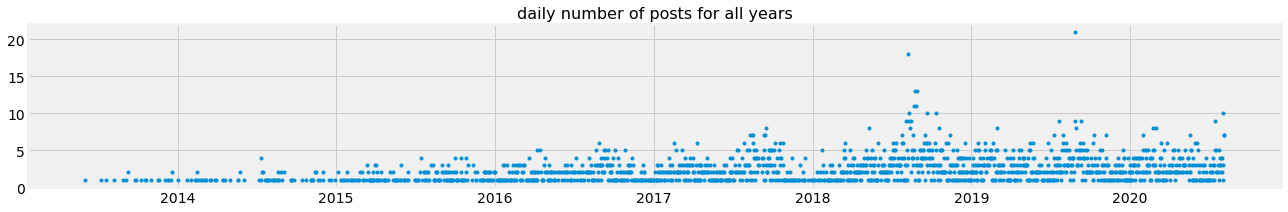

In [10]:
daily_count = df.groupby('Date').count()

plt.figure(figsize=(20,3))
plt.plot(daily_count['post_id'], marker='.', linestyle='')
# plt.xlim((pd.to_datetime('2014-07-01'), pd.to_datetime('2020-07-01')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily number of posts for all years',fontsize=16)

Text(0.5, 1.0, 'daily counts of posts')

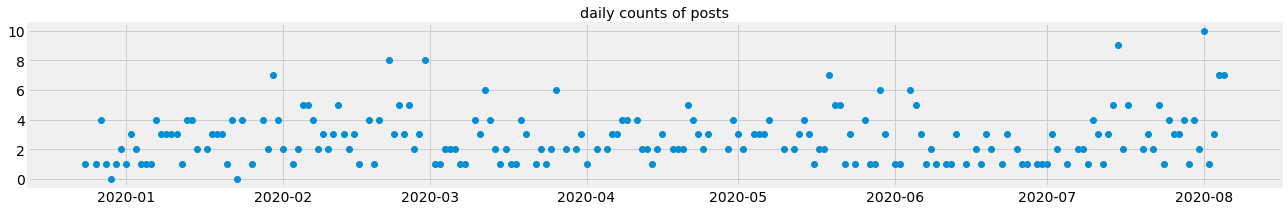

In [35]:
plt.figure(figsize=(20,3))
plt.plot(daily_count['2019-12-24':].index, daily_count['2019-12-24':].Poster, marker='o', linestyle='')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily counts of posts')

### Make weekly counts

In [12]:
df = df.set_index('Date')

Text(0.5, 1.0, 'Weekly counts of posts')

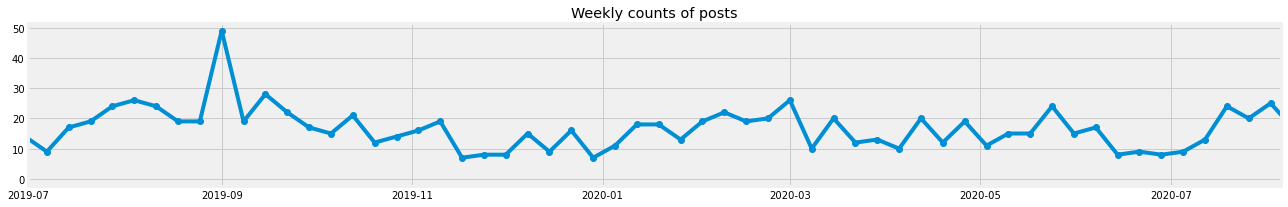

In [27]:
df_week_counts = df.resample('W').count() 

plt.figure(figsize=(20,3))
plt.xlim((pd.to_datetime('2019-07-01'), pd.to_datetime(time.ctime())))
plt.plot(df_week_counts.index, df_week_counts.Poster, marker='o', linestyle='-')
plt.title('Weekly counts of posts')

### Make Monthly counts

Text(0.5, 1.0, 'Monthly counts of posts')

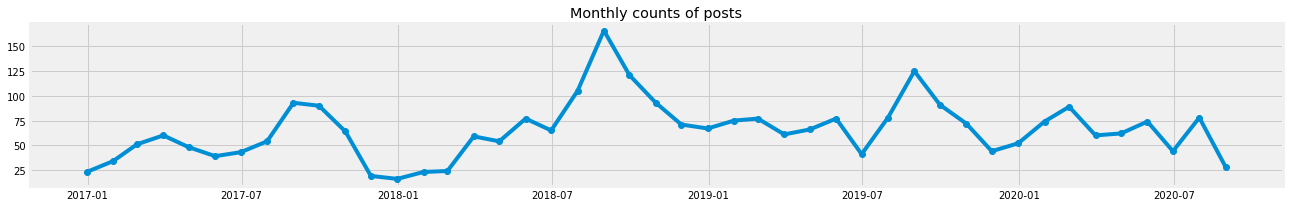

In [32]:
df_monthly_counts = df.resample('M').count()['2016-12-24':]

plt.figure(figsize=(20,3))
plt.plot(df_monthly_counts.index, df_monthly_counts.Poster, marker='o', linestyle='-')
plt.title('Monthly counts of posts')

In [31]:
df_monthly_counts.head()

,Poster,Replies,Views,post_id,post_title,company,is_referral
Date,,,,,,,
2016-12-31,23,23,23,23,23,23,23
2017-01-31,34,34,34,34,34,32,34
2017-02-28,51,52,52,52,52,50,52
2017-03-31,60,60,60,60,60,51,60
2017-04-30,48,49,49,49,49,46,49


#### We can see that the September is the peak month in the year for companies offering opportunities.

Text(0.5, 1.0, 'Rolling averages of daily posts offering internal referrals')

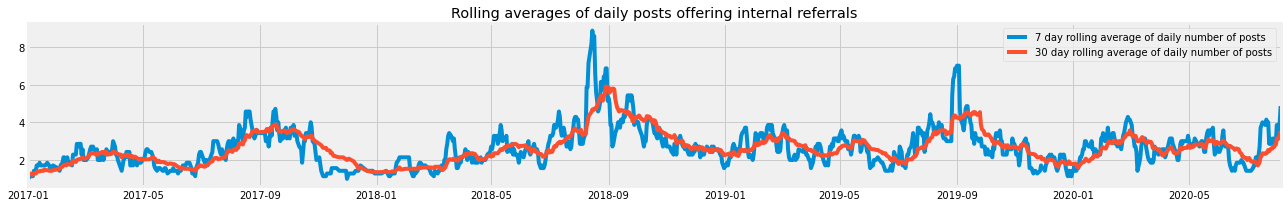

In [34]:
df_new = df.groupby('Date').count()

daily_post_avg_7 = df_new.rolling(7).mean()['Poster']
daily_post_avg_30 = df_new.rolling(28).mean()['Poster']

plt.figure(figsize=(20, 3))
plt.plot(daily_post_avg_7, label='7 day rolling average of daily number of posts')
plt.plot(daily_post_avg_30, label='30 day rolling average of daily number of posts')
plt.xlim((pd.to_datetime('2017-01-01'), pd.to_datetime(time.ctime())))
plt.legend()
plt.title('Rolling averages of daily posts offering internal referrals')
# plt.xticks([0, 1, 2], ['January', 'February', 'March'])

## - Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

In [16]:
posts_per_company = df['company'].value_counts()[:20]; posts_per_company.head()

Amazon       660
Google       297
Facebook     259
Microsoft    109
Uber          89
Name: company, dtype: int64

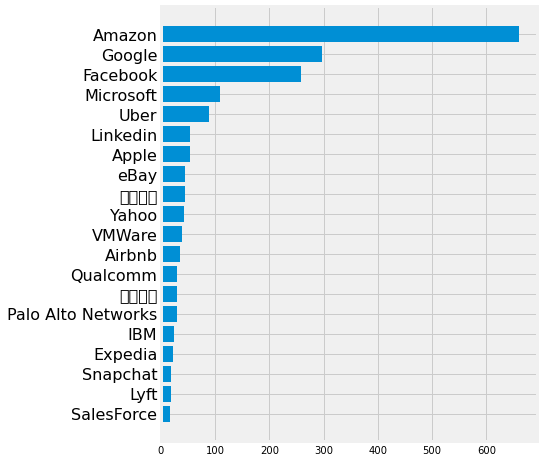

In [17]:
plt.figure(figsize=(6,8))
plt.barh(posts_per_company.index, posts_per_company.values)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()

## - Question 3. Who has created the largest amount of referrals?
### Top ten author ordered by number of posts and average views

In [18]:
poster_info = df.groupby(['Poster']).agg({'Views': ['count','sum', 'mean', 'min', 'max'], 'Replies': ['mean', 'min', 'max']})
poster_info.columns = ['_'.join(x) for x in poster_info.columns.ravel()]
poster_info.sort_values(by=['Views_count', 'Views_mean'], ascending=False).head(10)

,Views_count,Views_sum,Views_mean,Views_min,Views_max,Replies_mean,Replies_min,Replies_max
Poster,,,,,,,,
amazreferal,26,89548,3444.153846,453,14494,35.807692,3,247
lindaxia2003,14,47421,3387.214286,122,7618,25.500000,0,68
鸟月月,13,119752,9211.692308,4719,17509,130.769231,60,317
GetBusyLiving,13,33464,2574.153846,107,7169,25.769231,1,98
wanghwadad,12,97932,8161.000000,2343,32185,121.416667,19,678
斯卡洛夫斯基,12,52378,4364.833333,1855,8501,12.333333,2,48
地里小马甲,12,37134,3094.500000,989,8812,23.583333,0,109
Warald,10,123419,12341.900000,1818,35615,33.900000,0,169
JerryAi,10,15111,1511.100000,737,2994,7.500000,0,28
